#### Pandas GroupBy and Resampling Methods - Part 89

This notebook covers important methods for DataFrameGroupBy objects and Resampler objects, focusing on data manipulation and time series operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### DataFrame.diff() Method

The `diff()` method calculates the difference between elements in a DataFrame or Series. It's useful for computing discrete differences, especially in time series data.

In [2]:
# Create a sample DataFrame
df = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6],
    'b': [1, 1, 2, 3, 5, 8],
    'c': [1, 4, 9, 16, 25, 36]
})
print("Original DataFrame:")
print(df)

Original DataFrame:
   a  b   c
0  1  1   1
1  2  1   4
2  3  2   9
3  4  3  16
4  5  5  25
5  6  8  36


In [3]:
# Calculate the difference with previous row (default)
print("\nDifference with previous row (default):")
print(df.diff())


Difference with previous row (default):
     a    b     c
0  NaN  NaN   NaN
1  1.0  0.0   3.0
2  1.0  1.0   5.0
3  1.0  1.0   7.0
4  1.0  2.0   9.0
5  1.0  3.0  11.0


In [4]:
# Calculate the difference with 3rd previous row
print("\nDifference with 3rd previous row:")
print(df.diff(periods=3))


Difference with 3rd previous row:
     a    b     c
0  NaN  NaN   NaN
1  NaN  NaN   NaN
2  NaN  NaN   NaN
3  3.0  2.0  15.0
4  3.0  4.0  21.0
5  3.0  6.0  27.0


In [5]:
# Calculate the difference with following row
print("\nDifference with following row:")
print(df.diff(periods=-1))


Difference with following row:
     a    b     c
0 -1.0  0.0  -3.0
1 -1.0 -1.0  -5.0
2 -1.0 -1.0  -7.0
3 -1.0 -2.0  -9.0
4 -1.0 -3.0 -11.0
5  NaN  NaN   NaN


##### DataFrameGroupBy Methods

When you group data using `groupby()`, you get a DataFrameGroupBy object that provides various methods for manipulating and analyzing grouped data.

In [6]:
# Create a sample DataFrame with groups
df_group = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
    'B': [1, 2, np.nan, np.nan, 5, 6],
    'C': [np.nan, np.nan, 3, 4, 5, 6]
})
print("DataFrame with groups:")
print(df_group)

DataFrame with groups:
     A    B    C
0  foo  1.0  NaN
1  bar  2.0  NaN
2  foo  NaN  3.0
3  bar  NaN  4.0
4  foo  5.0  5.0
5  bar  6.0  6.0


In [7]:
# Group by column 'A'
grouped = df_group.groupby('A')
print("\nGrouped by column 'A':")
for name, group in grouped:
    print(f"\nGroup: {name}")
    print(group)


Grouped by column 'A':

Group: bar
     A    B    C
1  bar  2.0  NaN
3  bar  NaN  4.0
5  bar  6.0  6.0

Group: foo
     A    B    C
0  foo  1.0  NaN
2  foo  NaN  3.0
4  foo  5.0  5.0


### DataFrameGroupBy.ffill() - Forward Fill

The `ffill()` method fills NA/NaN values by propagating the last valid observation forward within each group.

In [8]:
# Forward fill NA values within each group
filled_ffill = grouped.ffill()
print("Forward filled values within groups:")
print(filled_ffill)

Forward filled values within groups:
     B    C
0  1.0  NaN
1  2.0  NaN
2  1.0  3.0
3  2.0  4.0
4  5.0  5.0
5  6.0  6.0


In [9]:
# Forward fill with limit
filled_ffill_limit = grouped.ffill(limit=1)
print("\nForward filled values with limit=1:")
print(filled_ffill_limit)


Forward filled values with limit=1:
     B    C
0  1.0  NaN
1  2.0  NaN
2  1.0  3.0
3  2.0  4.0
4  5.0  5.0
5  6.0  6.0


### DataFrameGroupBy.fillna() - Fill NA Values

The `fillna()` method fills NA/NaN values using the specified method or value within each group.

In [10]:
# Fill NA values with a specific value
filled_value = grouped.fillna(value=0)
print("NA values filled with 0 within groups:")
print(filled_value)

NA values filled with 0 within groups:
     B    C
0  1.0  0.0
1  2.0  0.0
2  0.0  3.0
3  0.0  4.0
4  5.0  5.0
5  6.0  6.0


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92967/3319555355.py:2: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  filled_value = grouped.fillna(value=0)


In [11]:
# Fill NA values using the 'backfill' method
filled_bfill = grouped.fillna(method='bfill')
print("\nNA values filled using backfill within groups:")
print(filled_bfill)


NA values filled using backfill within groups:
     B    C
0  1.0  3.0
1  2.0  4.0
2  5.0  3.0
3  6.0  4.0
4  5.0  5.0
5  6.0  6.0


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92967/2144153771.py:2: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  filled_bfill = grouped.fillna(method='bfill')
/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92967/2144153771.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_bfill = grouped.fillna(method='bfill')


##### Resampling Methods

Resampling is a time series-specific operation that allows you to change the frequency of your time series data. The `resample()` method returns a Resampler object that provides various methods for aggregating and transforming time series data.

In [12]:
# Create a sample time series
dates = pd.date_range('20230101', periods=10, freq='D')
ts = pd.Series(np.random.randn(10), index=dates)
print("Original time series:")
print(ts)

Original time series:
2023-01-01   -0.760150
2023-01-02   -1.938213
2023-01-03    0.383118
2023-01-04   -0.875104
2023-01-05   -1.167781
2023-01-06    0.397262
2023-01-07   -0.571392
2023-01-08    0.353528
2023-01-09    0.342819
2023-01-10    1.199245
Freq: D, dtype: float64


### Resampler.aggregate() / Resampler.agg() - Aggregate Resampled Data

The `aggregate()` (or `agg()`) method allows you to apply one or more aggregation functions to the resampled data.

In [13]:
# Resample to 3-day frequency and calculate the sum
resampled_sum = ts.resample('3D').agg(np.sum)
print("\nResampled to 3-day frequency (sum):")
print(resampled_sum)


Resampled to 3-day frequency (sum):
2023-01-01   -2.315246
2023-01-04   -1.645623
2023-01-07    0.124955
2023-01-10    1.199245
Freq: 3D, dtype: float64


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92967/1381468982.py:2: FutureWarning: The provided callable <function sum at 0x10635a840> is currently using DatetimeIndexResampler.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  resampled_sum = ts.resample('3D').agg(np.sum)


In [14]:
# Resample to 3-day frequency and apply multiple aggregation functions
resampled_multi = ts.resample('3D').agg(['sum', 'mean', 'std', 'max'])
print("\nResampled to 3-day frequency (multiple aggregations):")
print(resampled_multi)


Resampled to 3-day frequency (multiple aggregations):
                 sum      mean       std       max
2023-01-01 -2.315246 -0.771749  1.160709  0.383118
2023-01-04 -1.645623 -0.548541  0.832059  0.397262
2023-01-07  0.124955  0.041652  0.530938  0.353528
2023-01-10  1.199245  1.199245       NaN  1.199245


In [15]:
# Resample to 3-day frequency and apply custom aggregations
resampled_custom = ts.resample('3D').agg({
    'result': lambda x: x.mean() / x.std() if x.std() != 0 else np.nan,
    'total': np.sum
})
print("\nResampled to 3-day frequency (custom aggregations):")
print(resampled_custom)


Resampled to 3-day frequency (custom aggregations):
              result     total
2023-01-01 -0.664894 -2.315246
2023-01-04 -0.659257 -1.645623
2023-01-07  0.078449  0.124955
2023-01-10       NaN  1.199245


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92967/992908503.py:2: FutureWarning: The provided callable <function sum at 0x10635a840> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  resampled_custom = ts.resample('3D').agg({


### Resampler.transform() - Transform Resampled Data

The `transform()` method applies a function to each group and returns a Series with the transformed values.

In [16]:
# Resample to 3-day frequency and standardize the values within each group
resampled_transform = ts.resample('3D').transform(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0)
print("\nResampled and standardized values:")
print(resampled_transform)


Resampled and standardized values:
2023-01-01    0.009992
2023-01-02   -1.004959
2023-01-03    0.994966
2023-01-04   -0.392476
2023-01-05   -0.744226
2023-01-06    1.136702
2023-01-07   -1.154642
2023-01-08    0.587406
2023-01-09    0.567236
2023-01-10         NaN
Freq: D, dtype: float64


### Resampler.pipe() - Chain Operations

The `pipe()` method allows you to chain operations on a Resampler object, improving readability.

In [17]:
# Define custom functions
def add_mean_column(df):
    df['mean'] = df.mean(axis=1)
    return df

def add_std_column(df):
    df['std'] = df.std(axis=1)
    return df

# Create a DataFrame with multiple time series
df_ts = pd.DataFrame({
    'A': np.random.randn(10),
    'B': np.random.randn(10),
    'C': np.random.randn(10)
}, index=dates)
print("DataFrame with multiple time series:")
print(df_ts)

DataFrame with multiple time series:
                   A         B         C
2023-01-01 -1.238639  0.317378  0.199731
2023-01-02 -2.508560 -0.340987 -0.366601
2023-01-03 -0.878029  1.338540 -0.290673
2023-01-04  0.063423 -0.055242  1.104435
2023-01-05 -0.044769  0.625577 -0.827070
2023-01-06  0.248408 -0.769026  0.624993
2023-01-07 -0.214027 -1.485866  0.214679
2023-01-08  0.650913  0.197608 -0.975060
2023-01-09 -0.148925  1.069115  0.382821
2023-01-10  0.187425 -0.405255 -0.721604


In [18]:
# Use pipe to chain operations
result = (df_ts.resample('3D')
          .mean()
          .pipe(add_mean_column)
          .pipe(add_std_column))
print("\nResampled and processed using pipe:")
print(result)


Resampled and processed using pipe:
                   A         B         C      mean       std
2023-01-01 -1.541743  0.438310 -0.152514 -0.418649  0.829969
2023-01-04  0.089021 -0.066230  0.300786  0.107859  0.150425
2023-01-07  0.095987 -0.073047 -0.125853 -0.034304  0.094619
2023-01-10  0.187425 -0.405255 -0.721604 -0.313145  0.376781


##### Practical Example: Financial Time Series Analysis

In [19]:
# Create a sample financial time series
dates = pd.date_range('20230101', periods=30, freq='D')
np.random.seed(42)  # For reproducibility
stock_prices = pd.DataFrame({
    'Stock A': 100 + np.cumsum(np.random.normal(0.1, 1, 30)),
    'Stock B': 100 + np.cumsum(np.random.normal(0.05, 1.2, 30)),
    'Stock C': 100 + np.cumsum(np.random.normal(0.2, 0.8, 30))
}, index=dates)
print("Stock prices:")
print(stock_prices.head())

Stock prices:
               Stock A     Stock B    Stock C
2023-01-01  100.596714   99.327952  99.816661
2023-01-02  100.558450  101.600686  99.868133
2023-01-03  101.306138  101.634489  99.183065
2023-01-04  102.929168  100.415236  98.426100
2023-01-05  102.795015  101.452290  99.276121


In [20]:
# Calculate daily returns
daily_returns = stock_prices.pct_change().dropna()
print("\nDaily returns:")
print(daily_returns.head())


Daily returns:
             Stock A   Stock B   Stock C
2023-01-02 -0.000380  0.022881  0.000516
2023-01-03  0.007435  0.000333 -0.006860
2023-01-04  0.016021 -0.011996 -0.007632
2023-01-05 -0.001303  0.010328  0.008636
2023-01-06 -0.001305 -0.013948  0.012944


In [21]:
# Resample to weekly frequency and calculate various statistics
weekly_stats = daily_returns.resample('W').agg(['mean', 'std', 'min', 'max'])
print("\nWeekly return statistics:")
print(weekly_stats)


Weekly return statistics:
             Stock A                                 Stock B            \
                mean       std       min       max      mean       std   
2023-01-08  0.006448  0.007758 -0.001305  0.016357 -0.001762  0.015717   
2023-01-15 -0.004861  0.008797 -0.017254  0.006129 -0.003179  0.010080   
2023-01-22 -0.002282  0.009777 -0.013138  0.015883 -0.002307  0.011411   
2023-01-29 -0.003541  0.006808 -0.013223  0.004875  0.002515  0.009644   
2023-02-05 -0.001965       NaN -0.001965 -0.001965  0.012726       NaN   

                                 Stock C                                
                 min       max      mean       std       min       max  
2023-01-08 -0.022939  0.022881  0.002711  0.008138 -0.007632  0.012944  
2023-01-15 -0.017672  0.009673  0.002589  0.010994 -0.017983  0.013973  
2023-01-22 -0.021448  0.013949  0.000683  0.006791 -0.013253  0.008283  
2023-01-29 -0.009892  0.013651  0.002326  0.006683 -0.004248  0.013291  
2023-02-05  0.01

In [22]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1
print("\nCumulative returns:")
print(cumulative_returns.tail())


Cumulative returns:
             Stock A   Stock B   Stock C
2023-01-26 -0.019618 -0.025973  0.047191
2023-01-27 -0.030065 -0.035608  0.056531
2023-01-28 -0.025337 -0.038841  0.061170
2023-01-29 -0.030313 -0.034335  0.058928
2023-01-30 -0.032219 -0.022046  0.065045


<Figure size 1200x600 with 0 Axes>

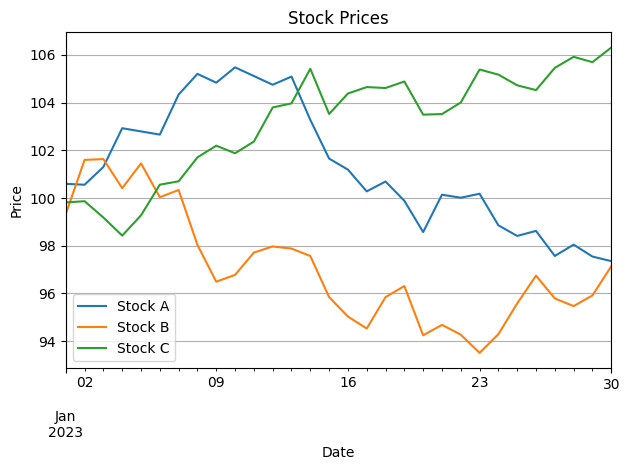

In [23]:
# Visualize stock prices
plt.figure(figsize=(12, 6))
stock_prices.plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

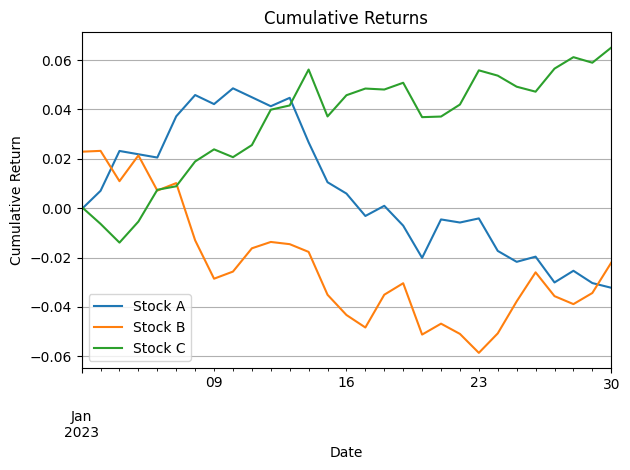

In [24]:
# Visualize cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()

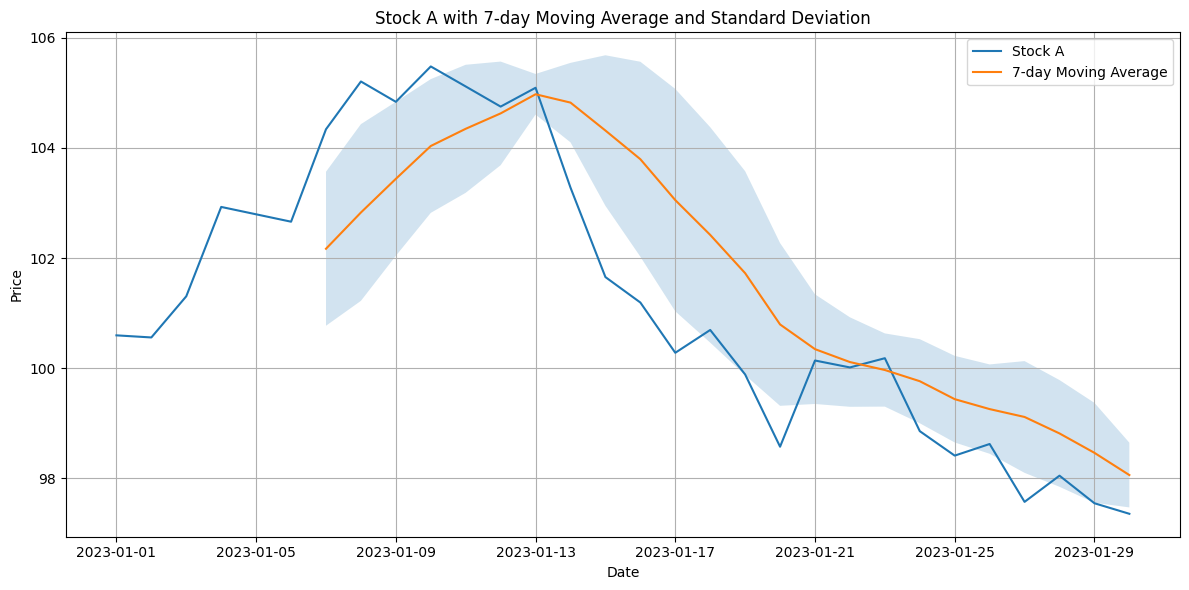

In [25]:
# Calculate rolling statistics
rolling_mean = stock_prices.rolling(window=7).mean()
rolling_std = stock_prices.rolling(window=7).std()

# Visualize rolling statistics for Stock A
plt.figure(figsize=(12, 6))
plt.plot(stock_prices['Stock A'], label='Stock A')
plt.plot(rolling_mean['Stock A'], label='7-day Moving Average')
plt.fill_between(rolling_std.index, 
                 rolling_mean['Stock A'] - rolling_std['Stock A'],
                 rolling_mean['Stock A'] + rolling_std['Stock A'],
                 alpha=0.2)
plt.title('Stock A with 7-day Moving Average and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()